In [1]:
import quandl
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
df = quandl.get("GDAX/BTC_USD", authtoken="u4fRHvvFzX_qnmB5p3wP")
days = [i for i in range(len(df))]
zipped = zip(df.High, df.Low)
w = 0
df['AverageDay'] = np.nan
for i in zipped:
    df['AverageDay'][w] = np.average(i)
    w += 1
df = df[['Open','High','Low','AverageDay']]
df.tail(10)

ImportError: No module named quandl

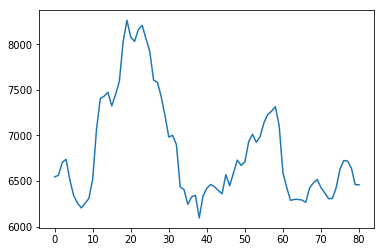

In [17]:
plt.plot(days, df.AverageDay)

In [22]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
X_high = np.array(df.drop(['AverageDay','Low','High'], 1))
y_high = np.array(df['High'])
X_train_high,X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high,test_size=0.25)

In [26]:
clf = LinearRegression()
clf.fit(X_train_high, y_train_high)
accuracy = clf.score(X_test_high, y_test_high)
accuracy

0.9634132804353642

In [27]:
def predictHigh(openingPrice):
    return int(clf.predict([openingPrice][0]))

In [28]:
X_low = np.array(df.drop(['Low','High','AverageDay'], 1))
y_low = np.array(df['Low'])

In [29]:
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low,test_size=0.25)

In [32]:
clfLow = LinearRegression()
clfLow.fit(X_train_low, y_train_low)
accuracy = clfLow.score(X_test_low, y_test_low)
accuracy

0.9228325283375408

In [36]:
def predictLow(openingPrice):
    return int(clfLow.predict([openingPrice][0]))

In [38]:
def PredictLowHigh(openingPrice):
    print("Today's Highest Price Should Be:", predictHigh(openingPrice))
    print("Today's Lowest Price Should Be:", predictLow(openingPrice))
    print("With an average of:", (predictHigh(openingPrice)+predictLow(openingPrice))/2)

In [40]:
PredictLowHigh(6435)


Today's Highest Price Should Be: 6592
Today's Lowest Price Should Be: 6307
With an average of: 6449.5


In [42]:
lowfunc = np.vectorize(predictLow)
low = [number for number in df['Open']]
lowfunc(low)
highfunc = np.vectorize(predictHigh)

In [43]:
df['Predicted Low'] = lowfunc(low)
df['Predicted High'] = highfunc(low)
df = df[['Open','High','Predicted High','Low','Predicted Low']]
df.tail()

,Open,High,Predicted High,Low,Predicted Low
Date,,,,,
2018-09-22,6728.98,6823.00,6884,6628.01,6576
2018-09-23,6700.01,6777.00,6856,6660.05,6550
2018-09-24,6711.99,6716.16,6868,6565.22,6561
2018-09-25,6597.43,6597.43,6754,6320.50,6456
2018-09-26,6399.48,6537.26,6557,6380.62,6275


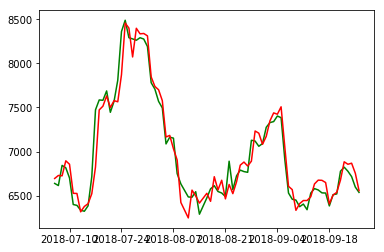

In [44]:
plt.plot(df['High'],'g',df['Predicted High'], 'r')

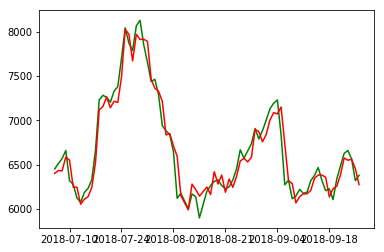

In [45]:
plt.plot(df['Low'], 'g', df['Predicted Low'], 'r')